ValueError: x and y must have same first dimension, but have shapes (238,) and (40,)

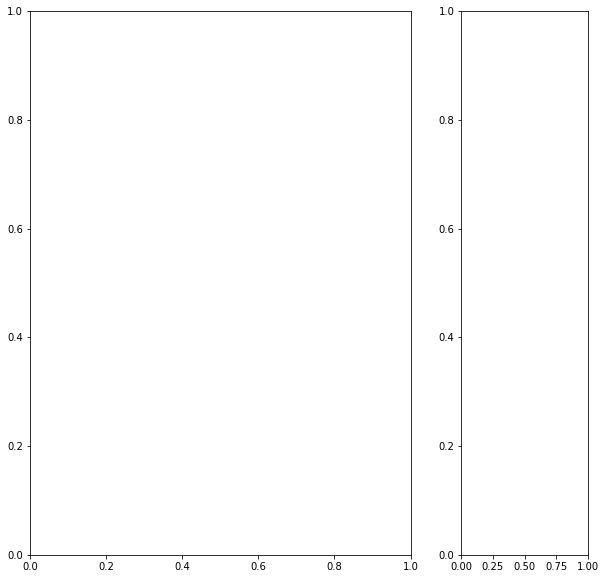

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors



x = np.arange(0, 238, 1)
bands_up = np.zeros((416,40))
# bands_dn = np.zeros((24,238))
Ef = 0.6383


# dos_up = np.zeros((2094))
# dos_dn = np.zeros((2094))
# x1 = np.zeros((2094))

i = 0
j = 0
with open('bands.dat') as fp:
    for line in fp:
        j = i//40
        item = line.split()  
        if(line=='\n' or line.strip()=='' or str.startswith(item[0],'#')):
            continue #skip comments and blank lines    
            print(i, j,'blank line!')
        bands_up[j][i - 40*j] = float(item[1])-Ef
        i+=1 
      
        
# with open('dos.dat') as fp:
#     for i, line in enumerate(fp):
#         item = line.split()
#         x1[i] = float(item[0])-Ef             
#         dos_up[i] = float(item[1])        
#         dos_dn[i] = float(item[2])  
        
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(10,10))


        
for i in range(24):
    ax1.plot(x,bands_up[i,:], color='red', linewidth=2)
#    ax1.plot(x,bands_dn[i], color='red', linewidth=1)

#ax1.set_aspect(3) 
ax1.set_title('spin dn', fontsize=18)
ax1.grid(color='black', linestyle='dotted', linewidth=0.5)
ax1.set_xticks([0, 100, 150, 237])
ax1.set_xticklabels(['Г', 'M', 'K', 'Г'])
ax1.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax1.set_xlim([0, 237])
ax1.set_ylim([-7, 4])
ax1.set_ylabel('energy (eV)', fontsize=18)  


# #ax2.plot(dos_up, x1, color='royalblue', linewidth=2)
# ax2.plot(dos_dn, x1, color='red', linewidth=2, label='spin_dn')
# ax2.set_xlim([0, 11])
# ax2.set_ylim([-7, 4])
# ax2.grid(color='black', linestyle='dotted', linewidth=0.5)
# ax2.tick_params(axis = 'both', which = 'major', labelsize = 20)
# # ax2.set_xticks([0, 1, 2 ,3])
# # ax2.legend(loc="upper right", fontsize=10)
# # ax2.legend()



fig.savefig('dn.png', dpi=300)
